# Estacionariedad


### Item 1

Una serie es *Estacionaria* a lo largo del tiempo cuando la **media** y la  **varianza** son constantes en el tiempo y, además, no presenta tendencia. Por el contrario, una serie temporal no es estacionaria si su **tendencia y/o variabilidad** cambian en el tiempo. Los cambios en la media determinan una tendencia a crecer o decrecer a largo plazo por lo que no oscilaría alrededor de un valor constante.

Si una serie es estacionaria, implica que,
$$\mu: Media \ constante$$

$$\sigma^2: Varianza \ constante$$

Ahora si tomamos dos secuencias de igual cantidad de datos consecutivos($S_1$ y $S_2$), obtendremos que:

$$ Cov(S_1) = Cov(S_2)$$

Esta característica se conoce como *estacionariedad en covarianza*.

  - El ruido blanco satisface las tres condiciones. 
      - $\mu: media \ constante$, $\sigma^2 \ constante$ y $cov(x_n,x_{n+k})=corr(x_n,x_{n+k})\sigma_n \sigma_{n+k}$
  

Por otro lado, *Estacionariedad estricta* se refiere a que dos muestras de una misma serie tendrán la **misma covarianza** y **misma distribución**.

$$(x_{t+\tau}, x_{t+k+\tau})\sim Dist(\mu, \sigma^2)$$

$$(x_{t+ \tau}, x_{t+k+\tau})\sim Dist(\mu, \sigma^2)$$


### Item 2 (mejorar explicación de la prueba)

En el análisis de series de tiempo es indispensable corroborar si los datos provienen de un proceso estacionario o no. En este contexto David Dickey y Wayne Fuller desarrollaron una prueba para ayudar. Esta prueba se conoce como Dickey-Fuller.

Está basada en un contraste de hipótesis donde:

$H_0: la\ serie\ no\ es\ estacionaria$ o  $H_0: \varphi = 1 $

$H_1: la\ serie\ es\ estacionaria$ o $H_0: \varphi < 1 $


donde $\varphi$ corresponde al coeficiente de autocorrelación o el coeficiente corrlación entre dos valores de una serie temporal. 
La función de autocorrelación con $k$ retrasos.
$$\varphi_k = corr(x_t, x_{t-k})$$

SEguidamente se calcula el valor de un estadístico $\lambda_0$ que depende de la muestra. Este se compara con un valor crítico $\lambda_{crit}$. Si $\lambda_0 < \lambda_{crit}$ se rechaza la $Ho$ y se acepta que la serie es estacionaria.

Con $p-value$ menores al nivel de significación $\alpha$ se rechaza la $H_0$

In [1]:
# Carga de paquetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga de data
rawCsvData = pd.read_csv("../../DataSets/Index2018.csv")
dfComp = rawCsvData.copy()

In [2]:
# Transformando la variable Date con pandas

dfComp.date = pd.to_datetime(dfComp.date, dayfirst = True)

In [3]:
dfComp.set_index('date', inplace=True)

In [4]:
# Definimos la frecuencia según el día ('d'), hora('h'), semana('w'), mensual ('m') y anual ('a')
dfComp = dfComp.asfreq('d')

In [5]:
# Podemos cambiar la transformación señalando serie para nmegocios

dfComp = dfComp.asfreq('b')


In [6]:
dfComp.spx =dfComp.spx.fillna(method = 'ffill')
dfComp.ftse =dfComp.ftse.fillna(method = 'bfill')
dfComp.dax =dfComp.dax.fillna(value = dfComp.dax.mean())
dfComp.nikkei =dfComp.nikkei.fillna(method = 'bfill')

In [7]:
dfComp['marketValue'] = dfComp.spx

In [8]:
del dfComp['spx']
del dfComp['dax']
del dfComp['ftse']
del dfComp['nikkei']

In [9]:
dfComp.shape

(6277, 1)

In [10]:
size= int(len(dfComp)*0.8)
size

5021

In [11]:
dfComp1 = dfComp.iloc[:size]
dfComp1.shape


(5021, 1)

In [12]:
# Generando white Noise a través de la data de precios como valores aleatorios.

WN= np.random.normal(loc = dfComp1.marketValue.mean(), scale = dfComp1.marketValue.std(), size = len(dfComp1))
WN.shape

(5021,)

In [13]:
# Generamos una columna adicional con el White Noise

dfComp1['whiteNoise'] = WN


<ipython-input-13-f9c2fcc48334>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfComp1['whiteNoise'] = WN


In [14]:
dfComp1.describe()

,marketValue,whiteNoise
count,5021.000000,5021.000000
mean,1091.651926,1090.549881
std,292.559287,290.335822
min,438.920000,94.960803
25%,914.620000,894.065657
50%,1144.650000,1089.731370
75%,1316.280729,1286.784642
max,1570.252238,2120.699020


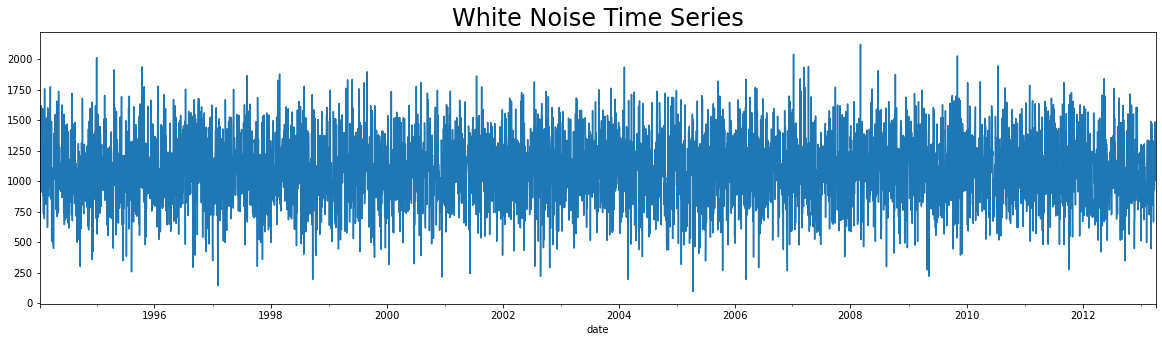

In [15]:
dfComp1.whiteNoise.plot(figsize = (20,5))
plt.title("White Noise Time Series", size = 24)
plt.show()

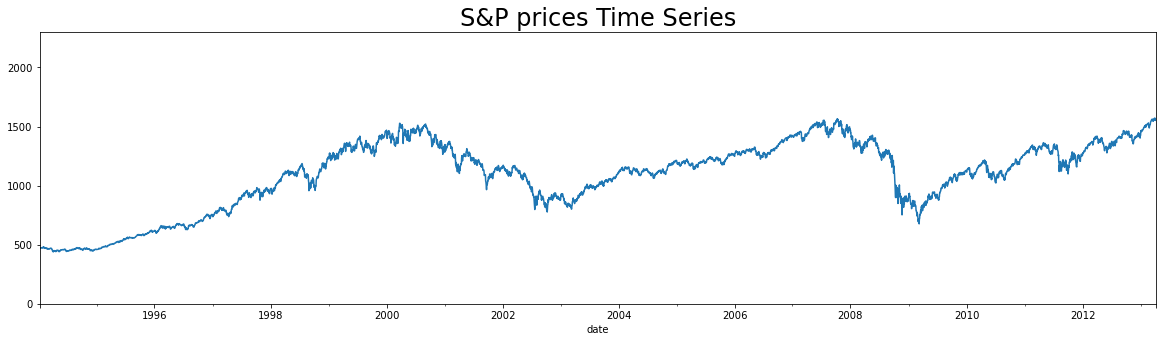

In [16]:
dfComp1.marketValue.plot(figsize = (20,5))
plt.title("S&P prices Time Series", size = 24)
plt.ylim(0,2300)
plt.show()

# Random Walk o Caminata aleatoria

### Corresponde a un tipo especial de serie temporal donde los valores tienden a persistir en el tiempo y la diferencias entre los valores son simplemente ruido blanco.

$$P_t = P_{t-1} + \epsilon_t$$ donde $\epsilon_t \sim WN(\mu, \sigma)$.

#### Como más nos alejamos da los datos disponibles, más nos confiamos de estimaciones, por lo que las predicciones pierden precisión

In [17]:
# Cargamos nuestra Dataset random Walk

rw = pd.read_csv("../../DataSets/RandWalk.csv")

In [18]:
rw.shape
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [19]:
# Vamos a transformar el índice a formato fecha
rw.date = pd.to_datetime(rw.date, dayfirst = True)


In [20]:
# Ahora vamos a fijarlo como índice

rw.set_index("date", inplace = True)

In [21]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [22]:
# Cambio de frecuencias 

rw = rw.asfreq('b')

In [23]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [24]:
dfComp1['rw'] = rw.price

<ipython-input-24-eb0c72f47b7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfComp1['rw'] = rw.price


In [25]:
dfComp1.head()

,marketValue,whiteNoise,rw
date,,,
1994-01-07,469.90,516.695787,1122.139662
1994-01-10,475.27,1499.371559,1080.347860
1994-01-11,474.13,744.239483,1082.095245
1994-01-12,474.17,1329.631650,1083.639265
1994-01-13,472.47,1146.742806,1067.146255


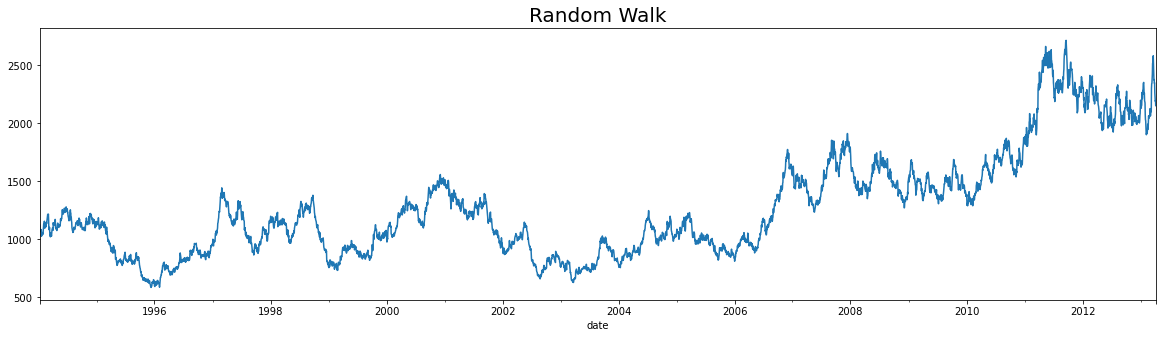

In [26]:
dfComp1.rw.plot(figsize = (20,5))
plt.title('Random Walk', size = 20)
plt.show()

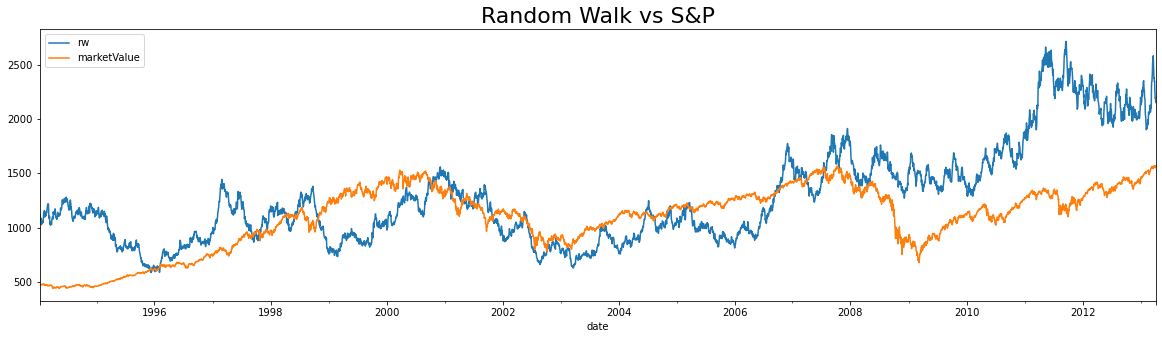

In [27]:
dfComp1.rw.plot(figsize = (20,5))
dfComp1.marketValue.plot()
plt.title('Random Walk vs S&P', size = 22)
plt.legend()
plt.show()

# Notemos que la serie RW es más parecida a los valores del precio que al WN

#### Eficiencia del mercado mide la dificultad para pronosticar valores futuros correctos.
#### si una se asemeja a una caminata aleatorio los precios no pueden predecirse con gran precisión.
#### Si los precios pueden predecirse con gran precisión el el futuro habrá oportunidades de arbitraje.

*NOTA DE LA MAESTRA: Una caminata aleatoria o random walk, la podemos generar de manera muy sencilla, haciendo uso de la distribución normal estándar (media cero y varianza uno). Les dejo aquí el código en Python para los que quieran saber cómo se generaría, fíjense que al final hacemos un plot, y si esto lo corren varias veces (o dentro de un ciclo for) verán que siempre obtienen un camino diferente:*



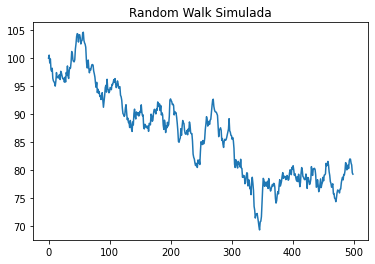

In [28]:
## CÓDIGO DE LA MEAESTRA
# Generamos 500 pasos aleatorios para la caminara, con media 0 y desv tipica 1
steps = np.random.normal(loc=0, scale=1, size=500)
 
# Ponemos el primer elemento a 0 para que el precio inicial sea el que pongamos nosotros
steps[0]=0
 
# Simulando los precios P con un precio inicial de 100
P = 100 + np.cumsum(steps)
 
# Plot
plt.plot(P)
plt.title("Random Walk Simulada")
plt.show()

# Estacionariedad con python

In [36]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import statsmodels.tsa.seasonal as ss


In [30]:
# Aplicando la pueba de D-F

sts.adfuller(dfComp1.marketValue)

# Vea que los valores críticos son más pequeños que el estadístico, por lo que no se rechaza la Ho y la serie es no estacionaria

(-1.7369847452352458,
 0.41216456967706105,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [31]:
# Random walk tampoco es estacionaria
sts.adfuller(dfComp1.rw)

(-1.3286073927689717,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

In [32]:
# White noise debería ser estaionario
sts.adfuller(dfComp1.whiteNoise)

(-51.042917426826996,
 0.0,
 1,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 70732.22729387502)

# Heterocedasticidad

La heterocedasticidad es una cualidad de una serie de tiempo que significa "varianza no constante", es lo contrario a homocedasticidad que significa "varianza constante".

Que la serie tenga una varianza constante es una propiedad que se busca a la hora de aceptar si es estacionaria, ya que anteriormente vimos que para que fuese estacionaria tenía que ser constante la media, la varianza y no tener tendencias.

Algunas veces el test de Dickey-Fuller puede fallar a la hora de clasificar a una serie como estacionaria cuando ve que la media y la tendencia son constantes, pero no es capaz de detectar que la varianza varía. En muchas ocasiones aún así se pueden aplicar los modelos que necesitan que la serie sea estacionaria (que veremos más adelante) pero conviene tener a mano algunos test que nos permitan decidir de manera estadísticamente significativa si realmente hay un problema de heterocedasticidad en nuestra serie o no, para poder tomar medidas de cara a los modelos y a las predicciones más adelante.

Existen varios test para esto. Uno es la prueba de Breusch-Pagan [bptest](https://www.rdocumentation.org/packages/lmtest/versions/0.9-38/topics/bptest) en R). El otro es el de McLeod-Li ([McLeod.Li.test](https://www.rdocumentation.org/packages/TSA/versions/1.01/topics/McLeod.Li.test) en R). Revisa los enlaces para ver las funciones, la descripción del método, cómo interpretar los resultados, y ver los ejemplos.

Para series de tiempo, la prueba de McLeod-Li suele ser la más apropiada. De todos modos siempre se debe acompañar esto con una inspección visual, es muy importante y debería ser al menos el primer paso antes de realizar cualquier prueba. Cuando tenemos una serie con problemas de heterocedasticidad, una de las soluciones más comunes suele ser aplicar la transformación logarítmica a la serie. Otra cuestión que deberíamos investigar es si esto puede deberse a la presencia de atípicos en nuestra serie, para consecuentemente eliminarlos.

# Estacionalidad

Esta sugiere que algunas tendencias a pareceran de forma cíclica.

Para estudiar estacionalidad se suele descomponer la serie en tres efectos: *1. Tendencia*, *2. Estacional* y *3. residual*.

Tendencia está asociada a un patrón consistente en los datos,  estacional expresa sus efectos cíclicos y el residual es la diferencia entre la data real y la estimación dada por el modelo.

Descomposición Clásica de una Serie Temporal:
  - Aditivo $$ X_t = \mu_t + S_t + \epsilon_t$$
 
  - Multiplicativo $$ X_t = \mu_t\cdot S_t \cdot \epsilon_t$$, donde $\mu_t$ es la tendencia, $S_t$ es la componente cíclica y $\epsilon_t$ es el residual.  



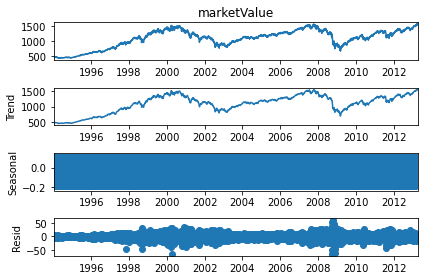

In [37]:
## Usando Seasonal decompose para descomponer la serie de tiempo
# Descomposición aditiva

sDecomposeAdditive = ss.seasonal_decompose(dfComp1.marketValue, model = "additive")
sDecomposeAdditive.plot()
plt.show()

# Como vemos en las gráficas la tendencia es muy parecida a la serie observada. Esto se debe que la fn de descomposión
# usa los valores del periodo anterior como un marcador de tendencia. El precio en el periodo presenteb es el mejor predictor.
# la parte de la tendencia explica la mayor parte de la variabilidad de los datos.
# Podría ser que no hay un patrón cíclico concreto ()
# Los residuos varían en periodos de inestabilidad por burbujas: dotcom y subprime

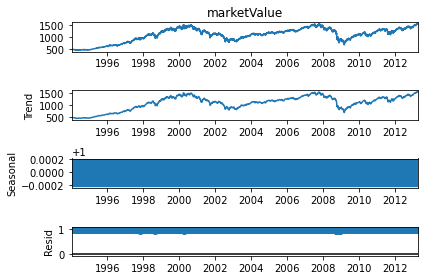

In [38]:
## Usando Seasonal decompose para descomponer la serie de tiempo
# Descomposición aditiva

sDecomposeMult = ss.seasonal_decompose(dfComp1.marketValue, model = "multiplicative")
sDecomposeMult.plot()
plt.show()